# Tarea de Regresión Logística
#### Sergio Adrian Martínez Tena

### Se importan las librerias necesarias para el ejercicio

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

### Se cargan la base de datos

In [2]:
weightHeightData = pd.read_csv('weight-height.csv')

### Una vista rápida a los datos

Una vista a los primeros elementos del conjunto de datos.

In [3]:
weightHeightData.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Se obtiene una descripcion simple del conjunto de datos y el tipo de variables.

In [4]:
weightHeightData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


Observamos que no hay ningun dato nulo en el conjunto de datos, que solo una variable es categorica y las otras dos son numéricas, y hay 10000 instancias en este conjunto de datos.

### Un vistazo a las etiquetas

En este caso los valores objetivos solo contienen dos clases (Female, Male). Donde ádemas la mitad de las instancias pertencen a la clase Female, mientras la otra mitad a Male.

In [5]:
weightHeightData['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

### Observar distribuciones

Primeramente se obtiene un resumen de las estadisticas descriptivas.

In [6]:
weightHeightData.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.367560,3.847528,54.263133,63.505620,66.318070,69.174262,78.998742
Weight,10000.0,161.440357,32.108439,64.700127,135.818051,161.212928,187.169525,269.989699


Se obtienen los histogramas de las variables númericas del conjunto de datos.

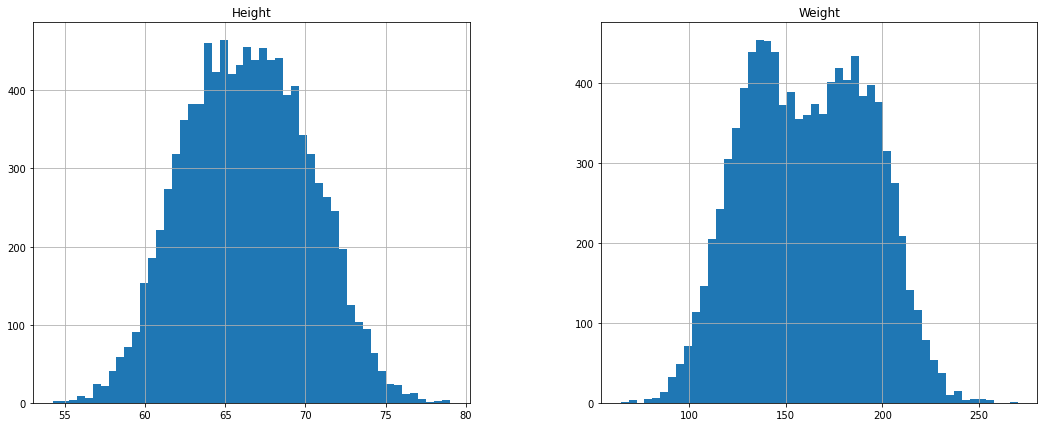

In [7]:
weightHeightData.hist(bins=50,figsize=(18,7));

Con estos últimos datos una de las cosas que podemos observar que el peso medio es de 161.44 lbs y la altura media es de 66.36 in. Además podemos notar que la mayoría de las alturas estan entre 60 in y 72 in, y la mayoría de los pesos entre 110 lbs y 210 lb (aproximadamente).

### Se dividen los datos en datos de entrenamiento y datos de prueba.

Antes de continuar el analisis de los datos se divide el 20% de los datos para las pruebas posteriores.

In [8]:
# Se toman el 80% de los datos y se separan el otro 20% para los datos de prueba
trainData = weightHeightData.sample(frac=0.8, random_state=1)
# Se toman el 20% restante como los datos de prueba
testData = weightHeightData.drop(trainData.index)

#### Revisar qué variables son colineales (Height y Weight)

Para este punto se utiliza el coeficiente de Pearson para observar que tan correlacionados estan los atributos numericos. Esto con el fin de cuantificar el grado en que las variables pudieran ser dependientes una de otra.

In [9]:
# Se calcula el el coeficiente de correlacion de pearson
trainData.corr(method='pearson')

,Height,Weight
Height,1.000000,0.925199
Weight,0.925199,1.000000


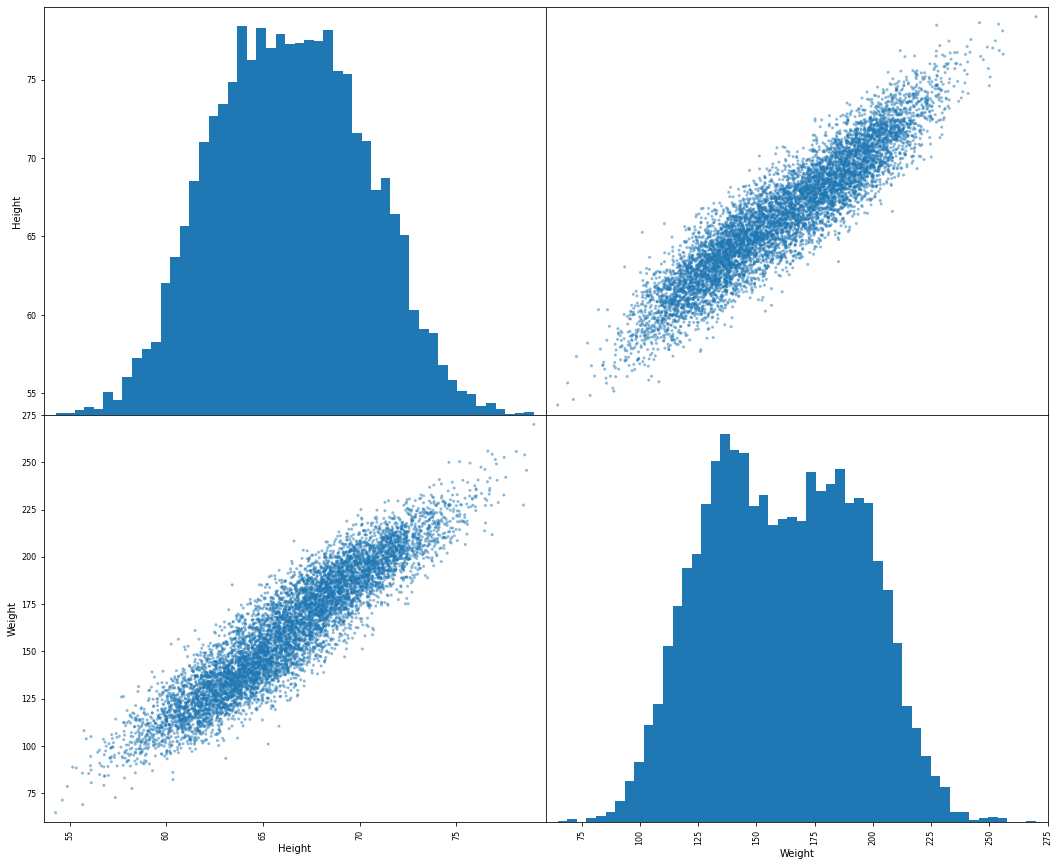

In [10]:
pd.plotting.scatter_matrix(trainData, figsize=(18,15), hist_kwds={'bins':50});

Con estas últimas figuras podemos notar claramente una fuerte correlacion positiva (0.924756) entre el peso y la altura.

## Generar el modelo de regresión logística

#### Se importan las librerias necesarias para el ejercicio

In [11]:
# Libreria Aprendizaje Computacional
import AC

#### Se seleccionan solo los atributos a utilizar en el modelo

In [12]:
# Se toman las variables independientes del conjunto de datos de entrenamiento
X_train = trainData[['Height','Weight']]
# Se toman las variables dependientes del conjunto
y_train = trainData[['Gender']]

#### Se convierten las variables categóricas a variables numéricas

In [13]:
y_train = y_train.apply(lambda x: pd.factorize(x, sort=True)[0])

Teniendo las etiquetas codificadas se grafican las tres juntas, donde el color de cada punto representa a que clase pertenecen.

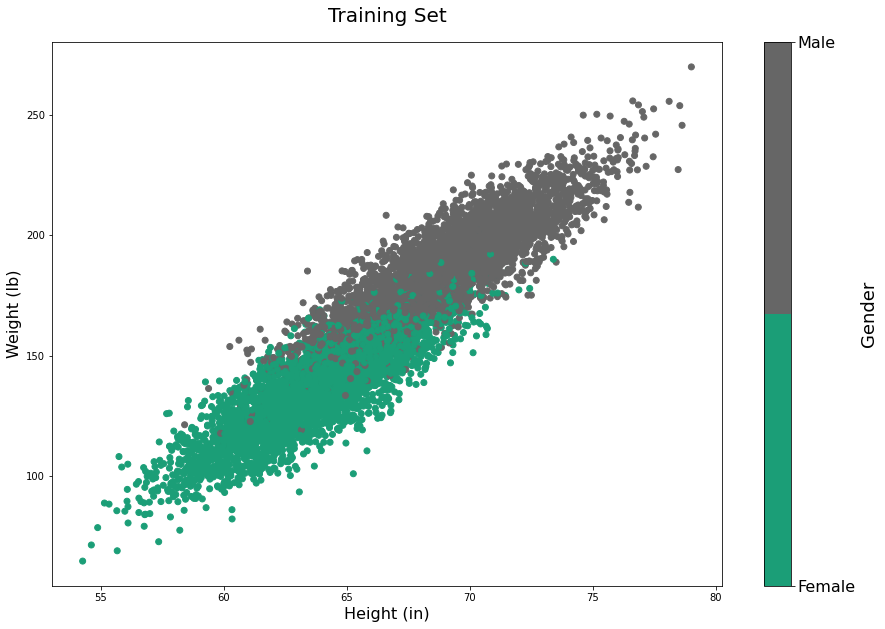

In [14]:
plt.figure(figsize=(15,10))
cmap = plt.get_cmap('Dark2', 2)
plt.scatter(X_train['Height'],X_train['Weight'],c=y_train['Gender'],cmap=cmap)
c = plt.colorbar();
c.set_ticks([0,1])
c.set_ticklabels(['Female','Male'],fontsize=16)
c.set_label("Gender",fontsize=18)
plt.title("Training Set",fontsize=20,pad=20);
plt.xlabel('Height (in)',fontdict={'size':16})
plt.ylabel('Weight (lb)',fontdict={'size':16});

#### Entrenamiento del modelo (Descenso del gradiente)

In [15]:
# Se inicializa el modelo
logisticModel = AC.LogisticRegression()
# Se entrena el modelo con los datos de entrenamiento
logisticModel.train(inputs=X_train, targets=y_train,
                    normalize=True, eta=0.7, epochs=6000)
coefficients = logisticModel.coeff
print('\nCoeficientes:')
print(f'𝛩_0:{coefficients[0]} 𝛩_1:{coefficients[1]} 𝛩_2:{coefficients[2]}')

Logistic Regressor Created

Coeficientes:
𝛩_0:[-10.61290335] 𝛩_1:[0.87289712] 𝛩_2:[21.69470594]


#### Comportamiento de la función de Costo

Costo Inicio: 0.7193054560365326
Costo Final: 0.23613111765432954


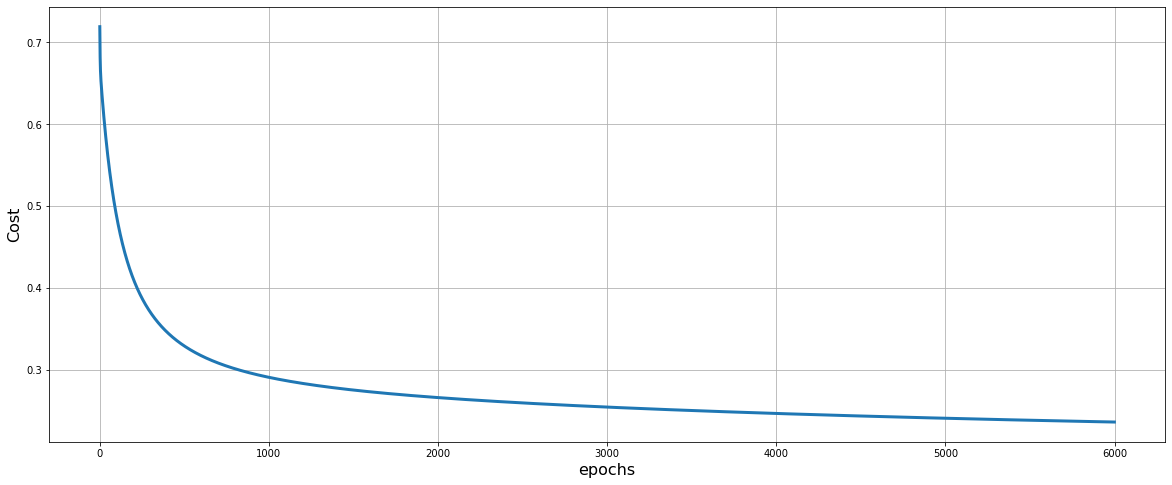

In [16]:
# Se grafica la funcion de costo durante cada iteracion del descenso del gradiente
plt.figure(figsize=(20,8))
plt.plot(logisticModel.costHistory, linewidth=3);
plt.xlabel('epochs',fontdict={'size':16});
plt.ylabel('Cost',fontdict={'size':16});
plt.grid(True)
print(f'Costo Inicio: {logisticModel.costHistory[0]}')
print(f'Costo Final: {logisticModel.costHistory[-1]}')

#### Límite de decisión y clasificacion de los datos de entrenamiento

In [17]:
# Recta del limite de decisión
f = lambda x: (coefficients[0]+ coefficients[1]*x)/(-coefficients[2])

In [18]:
# Se realiza la prediccion utilizando de nuevo los datos de entrenamiento
p_hat = logisticModel.predict(X_train, normalize=True)

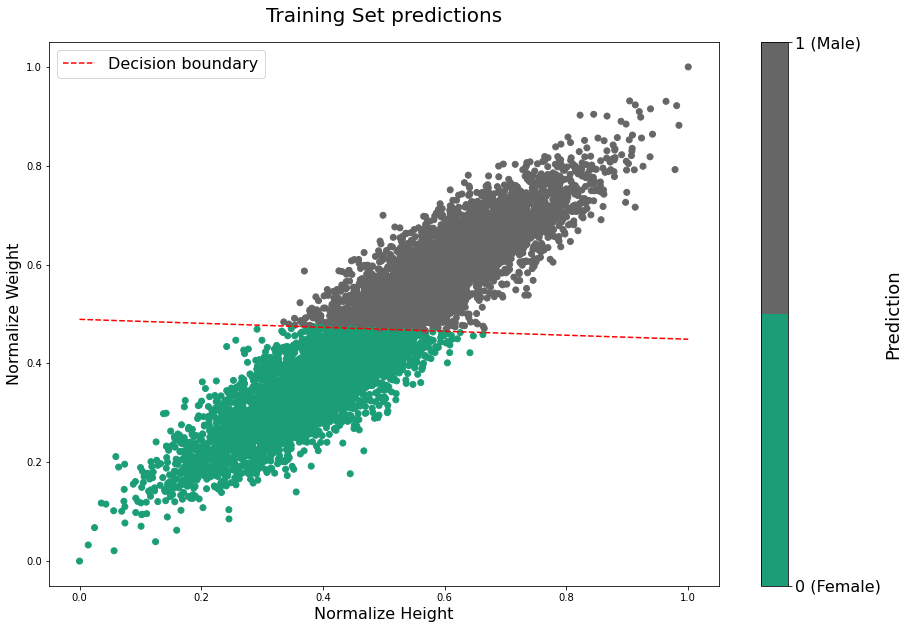

In [19]:
X_train_norm = AC.normalizeData(X_train)
x = np.linspace(0,1,101)
plt.figure(figsize=(15,10))
plt.scatter(X_train_norm['Height'],X_train_norm['Weight'],c=p_hat,cmap=cmap)
plt.plot(x,f(x),'r--', label='Decision boundary')
plt.legend(fontsize=16);
c = plt.colorbar();
c.set_ticks([0,1])
c.set_ticklabels(['0 (Female)','1 (Male)'],fontsize=16)
c.set_label("Prediction",fontsize=18)
plt.title("Training Set predictions",fontsize=20,pad=20);
plt.xlabel('Normalize Height',fontdict={'size':16})
plt.ylabel('Normalize Weight',fontdict={'size':16});

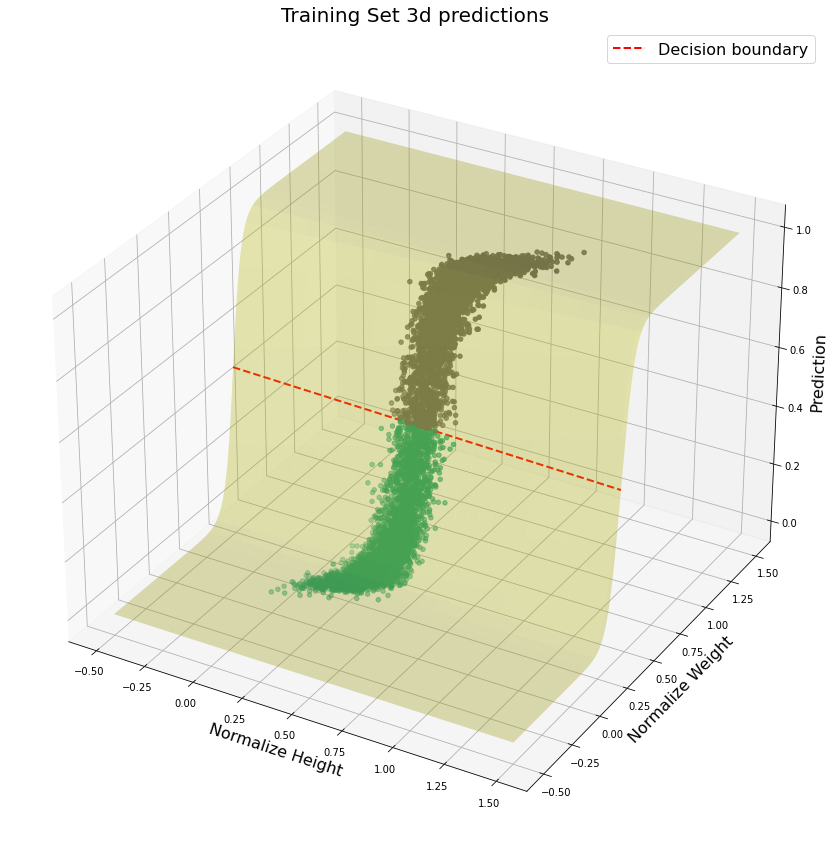

In [20]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
# Datos en 3d
ax.scatter3D(X_train_norm['Height'], X_train_norm['Weight'], p_hat, c=p_hat, cmap=cmap);
# Se genera el plano de la funcion
xx, yy = np.meshgrid(np.linspace(-0.5,1.5,101),np.linspace(-0.5,1.5,101))
z = logisticModel.sigmoid(coefficients[0]+ coefficients[1]*xx + coefficients[2]*yy)
ax.plot_surface(xx, yy, z, alpha=0.3,color='y')
# Limite de decision
x = np.linspace(-0.5,1.5,101)
c = pd.DataFrame({'x':x,'y':f(x)})
z = logisticModel.predict(c)
#plot the plane
ax.plot3D(x, f(x), z[:,0], '--', alpha=1,color='r', linewidth=2, label='Decision boundary');
ax.set_title('Training Set 3d predictions',fontsize=20)
ax.set_xlabel('Normalize Height',fontdict={'size':16})
ax.set_ylabel('Normalize Weight',fontdict={'size':16})
ax.set_zlabel('Prediction',fontdict={'size':16});
ax.legend(fontsize=16);

### Evaluando los datos de prueba

Una vez que se obtiene el modelo de regresion logistica, se evaluan los datos de prueba.

#### Se seleccionan solo los atributos a utilizar en el modelo

In [21]:
# Se toman las variables independientes del conjunto de datos de prueba
X_test = testData[['Height','Weight']]
# Se toman las variables dependientes del conjunto
y_test = testData[['Gender']]
# Se pasan las variables categoricas a numericas
y_test = y_test.apply(lambda x: pd.factorize(x, sort=True)[0])

#### Se realizan las predicciones usando los datos de prueba y el modelo generado

In [22]:
p_hat = logisticModel.predict(X_test, normalize=True)

#### Se obtiene el valor de la función de costo

In [23]:
final_cost = logisticModel.costFunction(p_hat,y_test)
print('Costo en los datos de prueba:',final_cost)

Costo en los datos de prueba: Gender    0.222
dtype: float64


#### Se grafican los dator reales junto con el límite de decisión

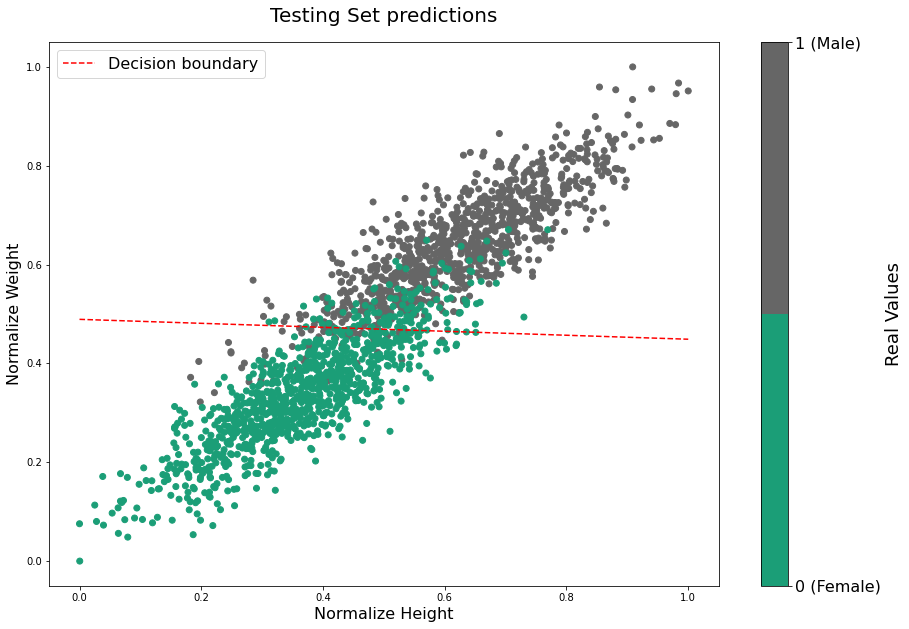

In [24]:
X_test_norm = AC.normalizeData(X_test)
x = np.linspace(0,1,101)
plt.figure(figsize=(15,10))
plt.scatter(X_test_norm['Height'],X_test_norm['Weight'],c=y_test['Gender'],cmap=cmap)
plt.plot(x,f(x),'r--', label='Decision boundary')
plt.legend(fontsize=16);
c = plt.colorbar();
c.set_ticks([0,1])
c.set_ticklabels(['0 (Female)','1 (Male)'],fontsize=16)
c.set_label("Real Values",fontsize=18)
plt.title("Testing Set predictions",fontsize=20,pad=20);
plt.xlabel('Normalize Height',fontdict={'size':16})
plt.ylabel('Normalize Weight',fontdict={'size':16});

### Se obtiene la matriz de confusión y las métricas de clasificación

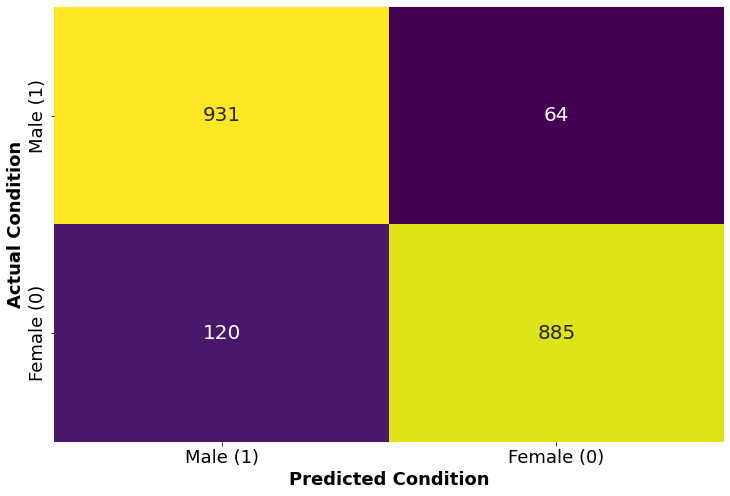

(                      counts
 Total Population        2000
 Total Positives (P)      995
 Total Negatives (N)     1005
 True Positives (TP)      931
 True Negatives (TN)      885
 False Positives (FP)     120
 False Negatives (FN)      64,
                               value
 Error (ERR)                0.092000
 Accuracy (ACC)             0.908000
 Sensitivity (TPR)          0.935678
 Specificity (TNR)          0.880597
 False Positive Rate (FPR)  0.119403
 Precision (PRE)            0.885823
 F1-Score (F1)              0.910068)

In [25]:
AC.clasificationMetrics(y_test,p_hat)

 Agunas cosas que se pueden notar calculando las métricas sobre el conjunto de pruebas:
- El modelo clasificó correctamente el 93.56% de los datos pertenecientes a la clase *Male* y el 88.15% de los datos pertenecientes a la clase *Female*.
- Del total de las predicciones que se hicieron 90.8% fueron correctas, por lo tanto, hubo un error en el 9.2% de los datos.

Las métricas anteriores se calcularon para un umbral de 0.5.

False Positive Rate: This means that every single sample that was not obese was incorrectly classified as obese.

True Positive Rate: This means that every single obese sample was correctly classified.

### Curva ROC, con área bajo la curva. 

Se calculan los puntos de la curva ROC.

In [36]:
thresholds = np.linspace(0,1,1001)
rocPoints = []
for threshold in thresholds:
    TP,TN,FP,FN = AC.getConfusionMatrixValues(y_test,p_hat,threshold)
    # Sensibilidad (Tasa de Verdaderos Positivos)
    TPR = TP/(TP+FN)
    # Tasa de falsos positivos
    FPR = FP/(TN+FP)
    rocPoints.append([TPR,FPR])
    
rocValues = pd.DataFrame(rocPoints, columns=['TPR','FPR'])
rocValues['Thresholds'] = thresholds

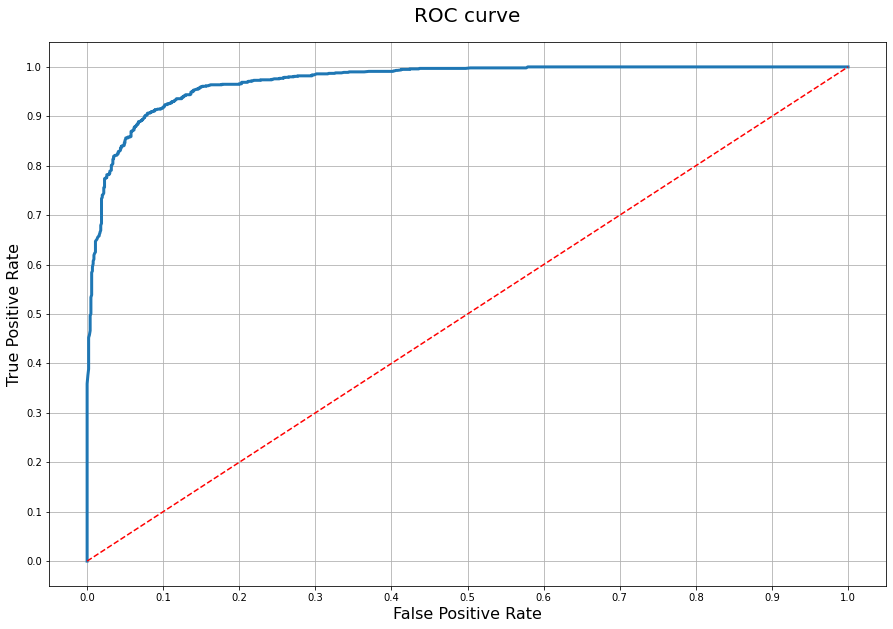

In [52]:
plt.figure(figsize=(15,10))
plt.plot(rocValues['FPR'],rocValues['TPR'], linewidth=3);
plt.title("ROC curve",fontsize=20,pad=20);
plt.xlabel('False Positive Rate',fontdict={'size':16})
plt.ylabel('True Positive Rate',fontdict={'size':16});
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.grid(True)
plt.plot([0,1], 'r--');

#### Área bajo la curva

Se calcula el área bajo la curva con el fin de poder comparar mas adelante diferentes modelos. Donde un modelo con mayor área bajo la curva es mejor que uno con menor área bajo la curva.

In [86]:
from numpy import trapz
x = rocValues.FPR[::-1]
y = rocValues.TPR[::-1]
area = trapz(y, x)
print("area =", area)

area = 0.9717057926448162
